# PART 3: MACHINE LEARNING

## 1. IMPORTING LIBRARIES

In [30]:
import csv
import pandas as pd
import numpy as np
#import pandas_profiling as pp
#from pandas_profiling import ProfileReport
from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot


from sklearn.metrics import confusion_matrix

In this section, we read the data, drop some columns that are not needed and convert our dataset to binary for ease of feeding it into the machine

In [2]:
df = pd.read_csv('cleaned_data.csv')                #reading the data

In [3]:
df

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2021010287148,2021,10287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,...,1,19,4,Small Engine cc,1,3,VOLKSWAGEN GOLF,10,1,E01023551
1,2021010287148,2021,10287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,...,3,34,12,Small Engine cc,1,2,BMW 1 SERIES,99,0,-1
2,2021010287148,2021,10287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,...,3,34,12,Small Engine cc,3,1,SMART FORTWO,99,0,-1
3,2021010287149,2021,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,...,1,32,6,Large Engine cc,2,11,AUDI Q7,99,0,-1
4,2021010287149,2021,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,...,1,21,5,Medium Engine cc,1,11,VAUXHALL ASTRA,3,1,E01004202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155413,2021991047985,2021,991047985,258164.0,666476.0,-4.268324,55.870508,99,3,2,...,1,32,6,Medium Engine cc,8,4,TOYOTA AURIS,1,1,-1
155414,2021991047985,2021,991047985,258164.0,666476.0,-4.268324,55.870508,99,3,2,...,1,51,8,Medium Engine cc,2,12,VAUXHALL INSIGNIA,4,1,-1
155415,2021991048010,2021,991048010,398935.0,866988.0,-2.019534,57.692707,99,2,2,...,1,32,6,Large Engine cc,2,18,BMW X5,3,1,-1
155416,2021991048010,2021,991048010,398935.0,866988.0,-2.019534,57.692707,99,2,2,...,3,34,12,Small Engine cc,2,3,RENAULT CAPTUR,99,0,-1


In [4]:
df1=df.copy()                                       #make a copy of the original data

In [6]:
# Dropping unnecessary columns
df1.drop(['accident_index', 'longitude', 'latitude', 'number_of_vehicles', 'number_of_casualties', 
                'date', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 
                'lsoa_of_accident_location'],axis=1, inplace=True)

In [7]:
df1.dropna()

,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,police_force,accident_severity,day_of_week,time,local_authority_district,local_authority_ons_district,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2021,10287148,521508.0,193079.0,1,3,6,02:05,-1,E09000003,...,1,19,4,Small Engine cc,1,3,VOLKSWAGEN GOLF,10,1,E01023551
1,2021,10287148,521508.0,193079.0,1,3,6,02:05,-1,E09000003,...,3,34,12,Small Engine cc,1,2,BMW 1 SERIES,99,0,-1
2,2021,10287148,521508.0,193079.0,1,3,6,02:05,-1,E09000003,...,3,34,12,Small Engine cc,3,1,SMART FORTWO,99,0,-1
3,2021,10287149,535379.0,180783.0,1,2,6,03:30,-1,E09000030,...,1,32,6,Large Engine cc,2,11,AUDI Q7,99,0,-1
4,2021,10287149,535379.0,180783.0,1,2,6,03:30,-1,E09000030,...,1,21,5,Medium Engine cc,1,11,VAUXHALL ASTRA,3,1,E01004202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155413,2021,991047985,258164.0,666476.0,99,3,7,21:00,-1,S12000043,...,1,32,6,Medium Engine cc,8,4,TOYOTA AURIS,1,1,-1
155414,2021,991047985,258164.0,666476.0,99,3,7,21:00,-1,S12000043,...,1,51,8,Medium Engine cc,2,12,VAUXHALL INSIGNIA,4,1,-1
155415,2021,991048010,398935.0,866988.0,99,2,1,20:00,-1,S12000034,...,1,32,6,Large Engine cc,2,18,BMW X5,3,1,-1
155416,2021,991048010,398935.0,866988.0,99,2,1,20:00,-1,S12000034,...,3,34,12,Small Engine cc,2,3,RENAULT CAPTUR,99,0,-1


In [8]:
df2 =df1.apply(lambda x : x.astype('category'))                     #convert dtype to category

In [9]:
df2 =df2.apply(lambda x: x.cat.codes)                               #convert dataset to binary

In [11]:
#define X and y for training and testing
dataset_y = df2[ 'accident_severity']
dataset_x = df2.drop([ 'accident_severity' ], axis= 1 )
X_train, X_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size= 0.20 , random_state= 42 )

We intend to check for the best columns to feed into our model which will improve the predictive ability of the algorithms  by selecting the most critical variables and eliminating the redundant and irrelevant ones.

## 2. FEATURE SELECTION USING RANDOM FOREST

In [19]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

importances = model.feature_importances_
dst_X = X_train
data = dst_X.columns
t = pd.DataFrame(data, columns = ['Features'])
t['Importances'] = importances
rank_attr = t.sort_values(by=['Importances'], ascending=False)
print(rank_attr[0:10])


                  Features  Importances
32       casualty_severity     0.564921
6                     time     0.022124
3   location_northing_osgr     0.020032
2    location_easting_osgr     0.017454
25    accident_reference_y     0.016833
1     accident_reference_x     0.016718
43      accident_reference     0.016583
27      casualty_reference     0.014144
30         age_of_casualty     0.013846
41        lsoa_of_casualty     0.013360


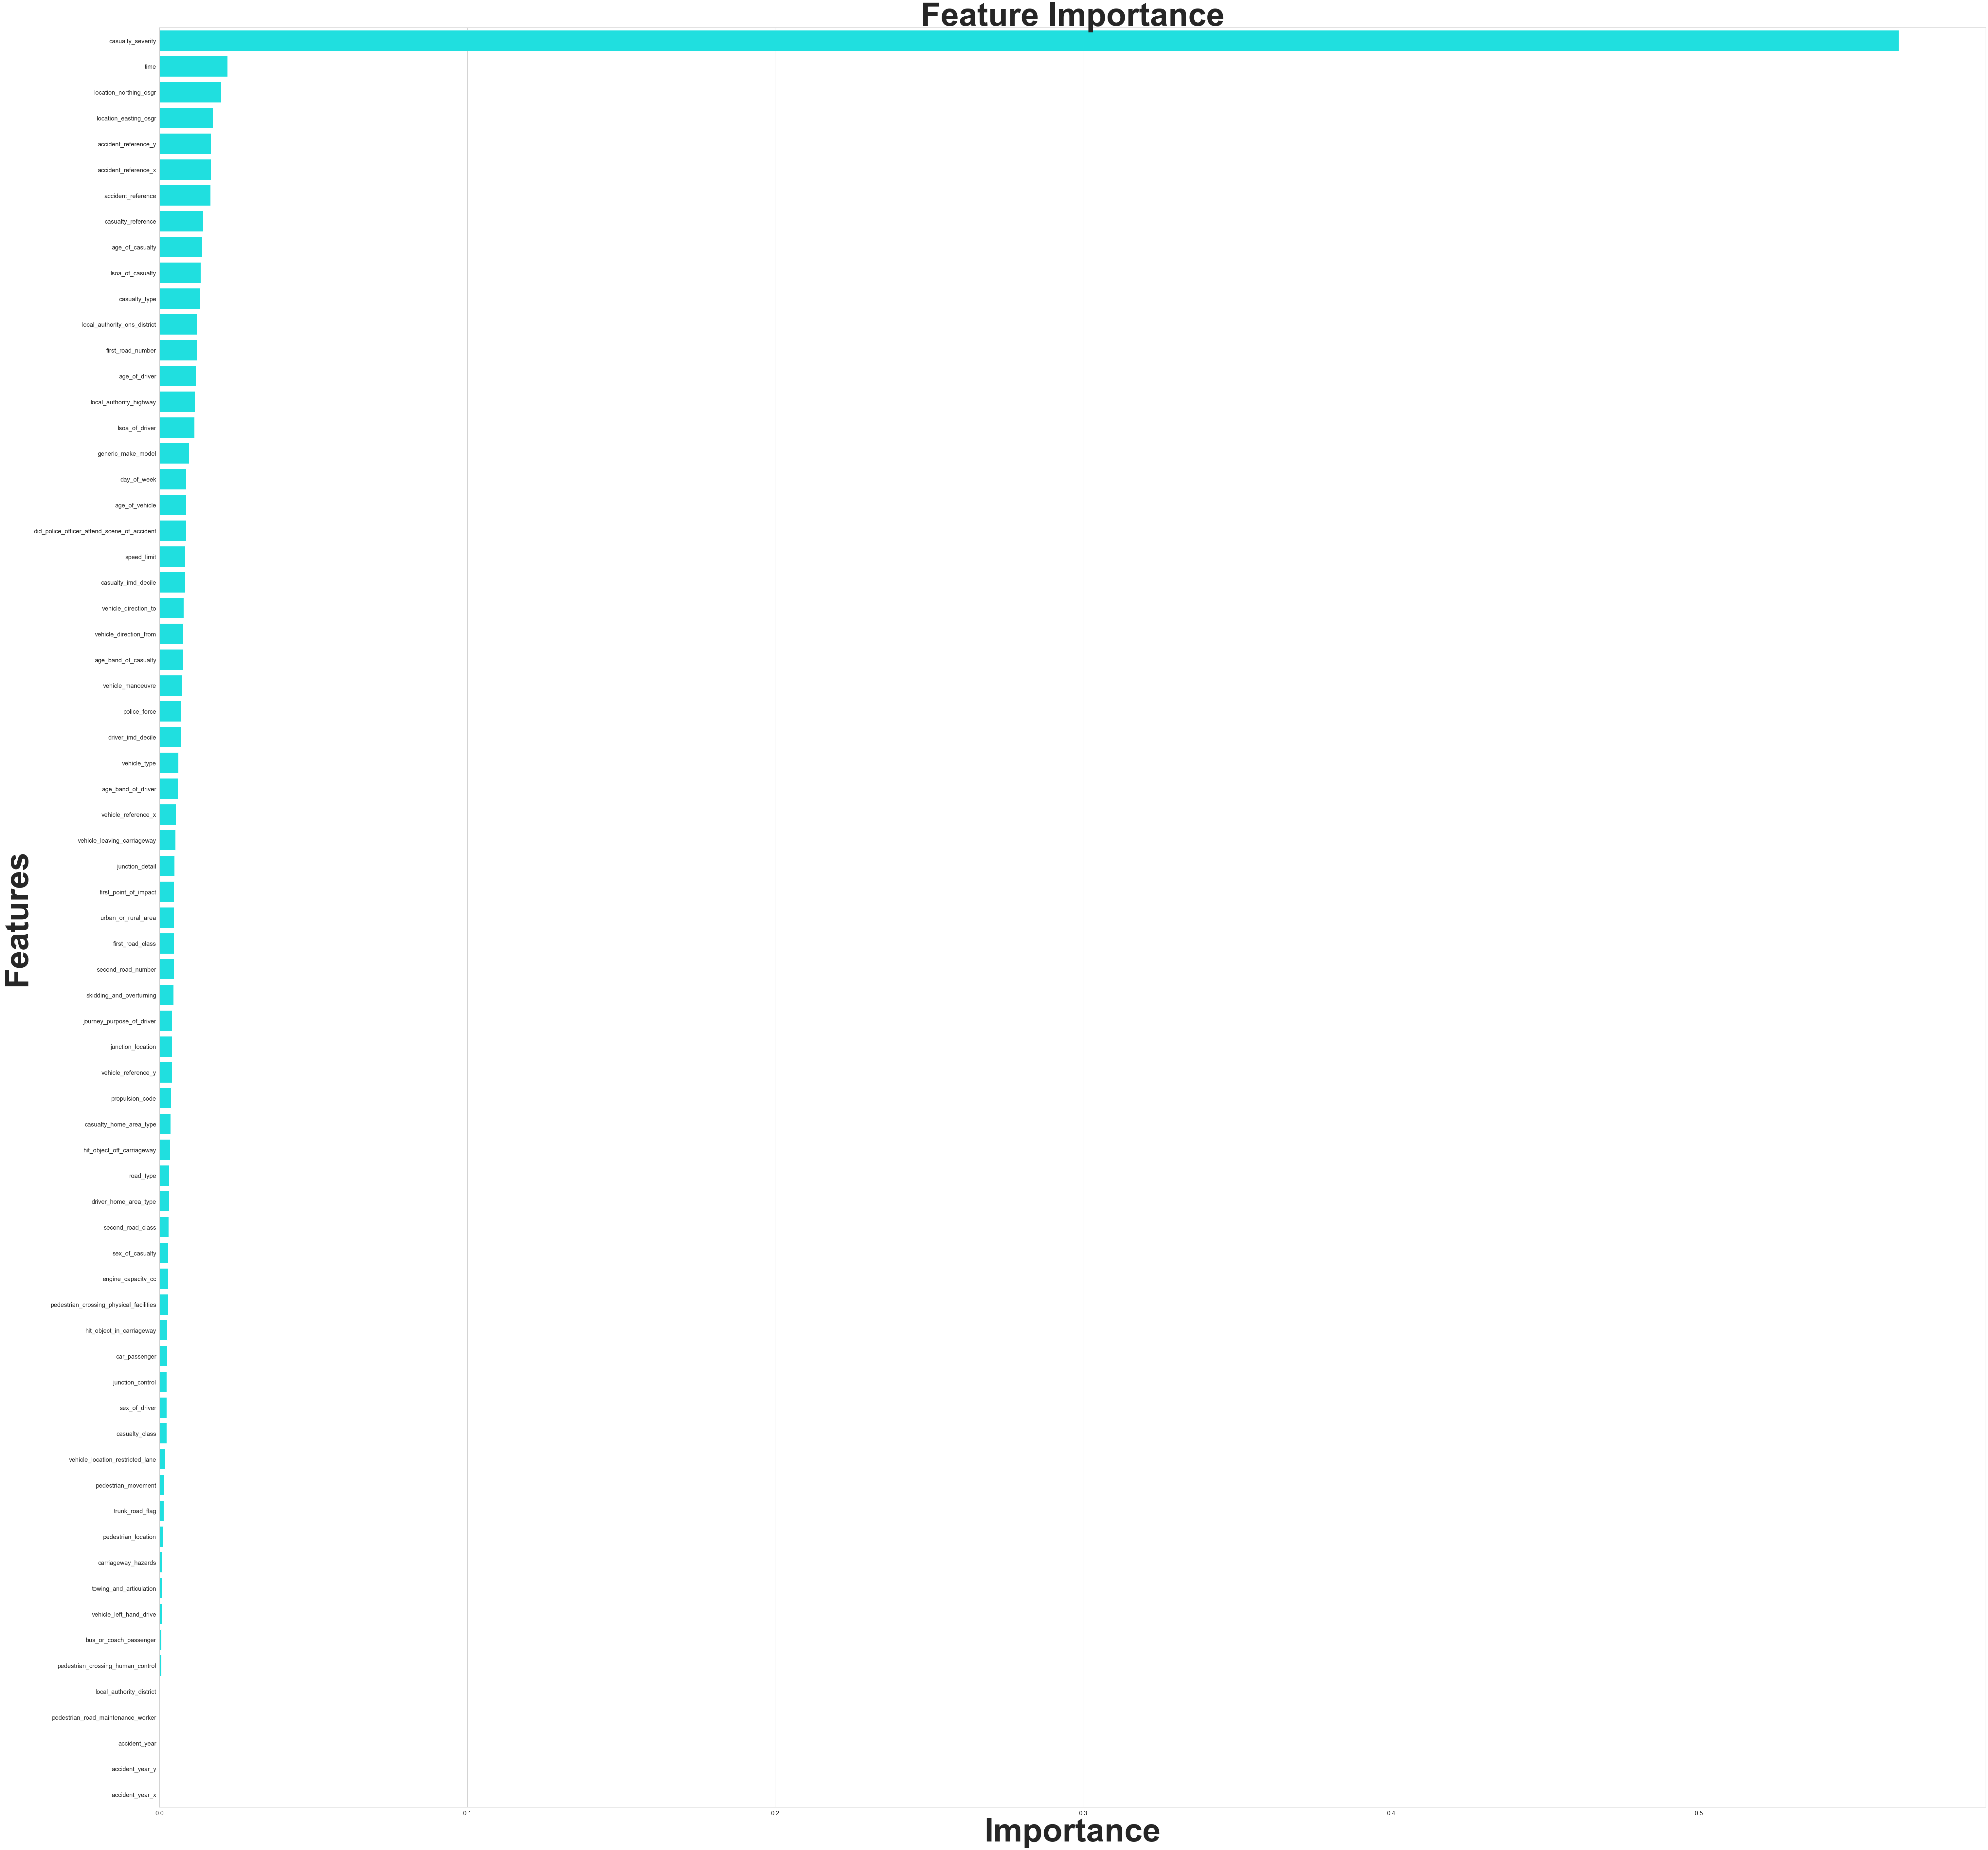

None

In [20]:
feats = {}
for feature, importance in zip(dst_X.columns, model.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 25)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(100,100)
sns.barplot(x=importances['Importance'], y=importances['Features'], data=importances, color='cyan')
plt.xlabel('Importance', fontsize=100, weight = 'bold')
plt.ylabel('Features', fontsize=100, weight = 'bold')
plt.title('Feature Importance', fontsize= 100, weight = 'bold')
display(plt.show())

Some columns are designated as predictors in addition to the variables found by our Random forest feature selector because there is little to no correlation between the variables.Thepredictors will be utilized in our modelling. The 80/20 train-test split is applied on the selected dataset.

In [33]:
#selecting predictors from the above features
predictors = df2[['did_police_officer_attend_scene_of_accident' , 'age_of_driver' ,'vehicle_type', 'age_of_vehicle',
                             'engine_capacity_cc','day_of_week' , 'road_type', 'casualty_severity',
                             'sex_of_driver' ,'speed_limit','pedestrian_location','junction_control','urban_or_rural_area']]

In [42]:
#selecting X and y parameters
X= predictors
y=df2['accident_severity']

In [43]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(predictors.values, 
                                              df2['accident_severity'].values,test_size=0.20, random_state=99)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124334, 13)
(31084, 13)
(124334,)
(31084,)


In [45]:
#imbalanced dataset
df2['accident_severity'].value_counts()

2    120493
1     31981
0      2944
Name: accident_severity, dtype: int64

We display our modelling in this part. Despite the fact that our dataset is very unbalanced, 4 different algorithms were used to make predictions of road traffic accident severity. We will evaluate these algorithms based on their accuracy and confusion matrix performance measures.

## 3. TRAINING THE ORIGINAL DATASET

### A: RANDOM FOREST CLASSIFIER

In [46]:
#define the random forest model
random_forest = RandomForestClassifier(n_estimators=200)
#fit the model on the train data
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
#confusion matrix
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 96.48
              precision    recall  f1-score   support

           0   0.923868  0.782230  0.847170       574
           1   0.959708  0.880381  0.918334      6412
           2   0.966783  0.991576  0.979022     24098

    accuracy                       0.964773     31084
   macro avg   0.950120  0.884729  0.914842     31084
weighted avg   0.964531  0.964773  0.964069     31084



Predicted,0,1,2,All
Actual,,,,
0,449,59,66,574
1,12,5645,755,6412
2,25,178,23895,24098
All,486,5882,24716,31084


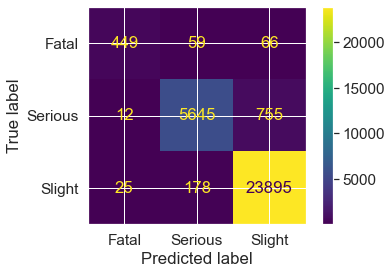

In [47]:
from sklearn.metrics import plot_confusion_matrix
#plot confusion matrix
sns.set(font_scale=1.4)
class_sentiment =['Fatal', 'Serious','Slight']
plot_confusion_matrix(random_forest,X_test,y_test, normalize =None, values_format='.0f',display_labels =class_sentiment)

### B: DECISION TREE

In [48]:
#define the decision tree model
decision_tree = DecisionTreeClassifier()
#fit the model on the training data
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
#pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 93.77
              precision    recall  f1-score   support

           0   0.719685  0.796167  0.755997       574
           1   0.840882  0.885995  0.862849      6412
           2   0.971131  0.954810  0.962901     24098

    accuracy                       0.937685     31084
   macro avg   0.843899  0.878991  0.860582     31084
weighted avg   0.939620  0.937685  0.938442     31084



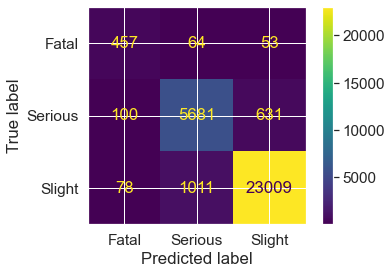

In [49]:
#confusion matrix
sns.set(font_scale=1.4)
class_sentiment =['Fatal', 'Serious','Slight']
plot_confusion_matrix(decision_tree,X_test,y_test, normalize =None, values_format='.0f',display_labels =class_sentiment)

### C: LOGISTIC REGRESSION

In [50]:
#define the logistic regression model
lr = LogisticRegression()
# Fit the model on the training data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
#pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 94.17
              precision    recall  f1-score   support

           0   1.000000  0.360627  0.530090       574
           1   0.954014  0.776513  0.856160      6412
           2   0.938733  0.999502  0.968165     24098

    accuracy                       0.941706     31084
   macro avg   0.964249  0.712214  0.784805     31084
weighted avg   0.943016  0.941706  0.936971     31084



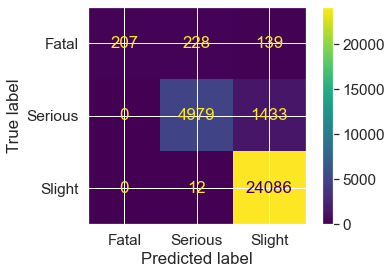

In [51]:
#plot confusion matrix
sns.set(font_scale=1.4)
class_sentiment =['Fatal', 'Serious','Slight']
plot_confusion_matrix(lr,X_test,y_test, normalize =None, values_format='.0f',display_labels =class_sentiment)

### D: K NEAREST NEIGBORS (K-NN)

In [52]:
KNeighbors_classifier = KNeighborsClassifier()                                      # define the K nearest neighbours model
KNeighbors=KNeighbors_classifier.fit(X_train,y_train)                               # train our K nearest neighbours model with the x and y training sets
kn_preds = KNeighbors.predict(X_test)

test_report_kn = classification_report(y_test, kn_preds)
# print the performace measures
print(test_report_kn)
print("Accuracy of KNeighbors Classifier:", metrics.accuracy_score(y_test, kn_preds))

              precision    recall  f1-score   support

           0       0.55      0.29      0.38       574
           1       0.71      0.47      0.56      6412
           2       0.87      0.96      0.91     24098

    accuracy                           0.85     31084
   macro avg       0.71      0.57      0.62     31084
weighted avg       0.83      0.85      0.83     31084

Accuracy of KNeighbors Classifier: 0.8450006434178355


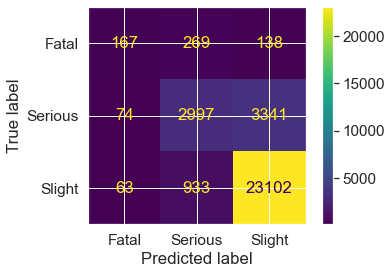

In [53]:
#plot confusion matrix
sns.set(font_scale=1.4)
class_sentiment =['Fatal', 'Serious','Slight']
plot_confusion_matrix(KNeighbors_classifier,X_test,y_test, normalize =None, values_format='.0f',display_labels =class_sentiment)

In this section, more tests are carried out utilising the smote approach to balance our dataset, and the same algorithms are tested on the new dataset. Our investigation of the significance of the dataset in predictions will be aided by the resultant accuracy % as well as other evaluating factors.

### E: SMOTE OVERSAMPLING TECHNIQUES FOR HANDLING IMBALANCED DATASET

In [54]:
sm = SMOTE()

X=np.array(X)

X, y = sm.fit_resample(X, y.ravel())

In [55]:
# Oversampling
sm = SMOTE(random_state=0)
X, y = sm.fit_resample(X, y)
## train test split
X_train_over,X_test_over,y_train_over,y_test_over = train_test_split(X,y,test_size=0.2,random_state=42)
#setting 20% aside as validation data for cross validation
x_train_t, x_train_v, y_train_t, y_train_v = train_test_split(X_train_over, y_train_over, test_size = 0.2, random_state = 42)

In [56]:
pd.Series(y).value_counts()

2    120493
1    120493
0    120493
dtype: int64

### F: RANDOM FOREST FOR OVERSAMPLED DATASET

In [57]:
#define the model
random_forest = RandomForestClassifier(n_estimators=200)
#fit the model
random_forest.fit(X_train_over,y_train_over)
Y_pred = random_forest.predict(X_test_over)
random_forest.score(X_test_over, y_test_over)
acc_random_forest1 = round(random_forest.score(X_test_over, y_test_over) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test_over, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test_over, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 98.02
              precision    recall  f1-score   support

           0   0.994280  0.995222  0.994751     24277
           1   0.980660  0.963101  0.971801     23903
           2   0.965907  0.982128  0.973950     24116

    accuracy                       0.980234     72296
   macro avg   0.980282  0.980150  0.980167     72296
weighted avg   0.980312  0.980234  0.980224     72296



Predicted,0,1,2,All
Actual,,,,
0,24161,70,46,24277
1,92,23021,790,23903
2,47,384,23685,24116
All,24300,23475,24521,72296


### G: LOGISTIC REGRESSION FOR OVERSAMPLED DATASET

In [58]:
#define the model
lr = LogisticRegression()
# Fit the model on the training data.
lr.fit(X_train_over, y_train_over)
y_pred = lr.predict(X_test_over)
sk_report = classification_report(
    digits=6,
    y_true=y_test_over, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test_over)*100,2))
print(sk_report)
pd.crosstab(y_test_over, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 80.36
              precision    recall  f1-score   support

           0   0.802091  0.799646  0.800866     24277
           1   0.791813  0.668452  0.724922     23903
           2   0.813391  0.941491  0.872766     24116

    accuracy                       0.803585     72296
   macro avg   0.802432  0.803196  0.799518     72296
weighted avg   0.802462  0.803585  0.799741     72296



Predicted,0,1,2,All
Actual,,,,
0,19413,2791,2073,24277
1,4789,15978,3136,23903
2,1,1410,22705,24116
All,24203,20179,27914,72296


### H: DECISION TREE FOR OVERSAMPLED DATASET

In [59]:
#define the model
decision_tree = DecisionTreeClassifier()
#fit the model on training data
decision_tree.fit(X_train_over, y_train_over)
Y_pred = decision_tree.predict(X_test_over)
acc_decision_tree1 = round(decision_tree.score(X_test_over, y_test_over) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test_over, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test_over, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 96.81
              precision    recall  f1-score   support

           0   0.985689  0.995840  0.990738     24277
           1   0.948788  0.962641  0.955664     23903
           2   0.969767  0.945679  0.957571     24116

    accuracy                       0.968131     72296
   macro avg   0.968081  0.968053  0.967991     72296
weighted avg   0.968177  0.968131  0.968078     72296



Predicted,0,1,2,All
Actual,,,,
0,24176,61,40,24277
1,222,23010,671,23903
2,129,1181,22806,24116
All,24527,24252,23517,72296


In [77]:
KNeighbors_classifier = KNeighborsClassifier()                                      # define the K nearest neighbours model
KNeighbors=KNeighbors_classifier.fit(X_train_over,y_train_over)                     # train our K nearest neighbours model with the x and y training sets
kn_preds = KNeighbors.predict(X_test_over)
test_report_kn = classification_report(y_test_over, kn_preds)
# print the performace measures
print(test_report_kn)

print("Accuracy of KNeighbors Classifier:", metrics.accuracy_score(y_test_over, kn_preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     24277
           1       0.87      0.95      0.91     23903
           2       0.96      0.84      0.90     24116

    accuracy                           0.93     72296
   macro avg       0.93      0.93      0.93     72296
weighted avg       0.93      0.93      0.93     72296

Accuracy of KNeighbors Classifier: 0.9298024786986832
